# Exploratory Data Analysis on Global Movies (1950-2020)

### 1. Data Loading and Preprocessing

In [143]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
# Add the src directory to the Python path
sys.path.append('../src')

# Import the data scraper function
from data_scraper import scrape_imdb_movies_with_selenium

# Call the data scraper function
scrape_imdb_movies_with_selenium()

In [71]:
# Define the file path
file_path = "../data/imdb_top_movies.csv"
# Read the CSV file into a DataFrame
movies_df = pd.read_csv(file_path)  

In [72]:
# Display the first few rows of the DataFrame
print(movies_df.head())

                         Title  Year      Rating  \
0  1. The Shawshank Redemption  1994    9.3 (3M)   
1             2. The Godfather  1972  9.2 (2.1M)   
2           3. The Dark Knight  2008    9.0 (3M)   
3     4. The Godfather Part II  1974  9.0 (1.4M)   
4              5. 12 Angry Men  1957  9.0 (917K)   

                                               Genre  \
0            Epic, Period Drama, Prison Drama, Drama   
1              Epic, Gangster, Tragedy, Crime, Drama   
2  Action Epic, Epic, Superhero, Tragedy, Action,...   
3              Epic, Gangster, Tragedy, Crime, Drama   
4     Legal Drama, Psychological Drama, Crime, Drama   

                                         Director(s)  \
0  Jack Lawrence, Frank Darabont, Bob Gunton, Han...   
1  Marlon Brando, Kay Adams, Al Pacino, Francis F...   
2  Aaron Eckhart, Christopher Nolan, Jack Nichols...   
3  Al Pacino, Robert Duvall, Robert De Niro, Fran...   
4  Martin Balsam, E.G. Marshall, Juror #10, Lee J...   

             

In [73]:
# Check the shape of the dataset
movies_df.shape

(250, 7)

In [74]:
# View column names
movies_df.columns

Index(['Title', 'Year', 'Rating', 'Genre', 'Director(s)', 'Box Office Revenue',
       'Lead Actors'],
      dtype='object')

In [75]:
# Check for missing values
movies_df.isnull().sum()

Title                 0
Year                  0
Rating                0
Genre                 0
Director(s)           0
Box Office Revenue    0
Lead Actors           0
dtype: int64

In [76]:
# Summary statistics
movies_df.describe()

,Year
count,250.000000
mean,1988.432000
std,25.601153
min,1921.000000
25%,1972.250000
50%,1995.000000
75%,2009.000000
max,2024.000000


In [77]:
# Check for duplicates
movies_df.duplicated().sum()

np.int64(0)

In [78]:
# Rename the columns
movies_df.columns = ['title', 'year', 'rating', 'genre', "directors", "revenue", "lead_actors"]
print(movies_df.head())

                         title  year      rating  \
0  1. The Shawshank Redemption  1994    9.3 (3M)   
1             2. The Godfather  1972  9.2 (2.1M)   
2           3. The Dark Knight  2008    9.0 (3M)   
3     4. The Godfather Part II  1974  9.0 (1.4M)   
4              5. 12 Angry Men  1957  9.0 (917K)   

                                               genre  \
0            Epic, Period Drama, Prison Drama, Drama   
1              Epic, Gangster, Tragedy, Crime, Drama   
2  Action Epic, Epic, Superhero, Tragedy, Action,...   
3              Epic, Gangster, Tragedy, Crime, Drama   
4     Legal Drama, Psychological Drama, Crime, Drama   

                                           directors  \
0  Jack Lawrence, Frank Darabont, Bob Gunton, Han...   
1  Marlon Brando, Kay Adams, Al Pacino, Francis F...   
2  Aaron Eckhart, Christopher Nolan, Jack Nichols...   
3  Al Pacino, Robert Duvall, Robert De Niro, Fran...   
4  Martin Balsam, E.G. Marshall, Juror #10, Lee J...   

             

In [79]:
#Divide the rating column into two columns with rating and votes
movies_df[['rating', 'votes']] = movies_df['rating'].str.split("(", expand=True)
print(movies_df.head())

                         title  year rating  \
0  1. The Shawshank Redemption  1994   9.3    
1             2. The Godfather  1972   9.2    
2           3. The Dark Knight  2008   9.0    
3     4. The Godfather Part II  1974   9.0    
4              5. 12 Angry Men  1957   9.0    

                                               genre  \
0            Epic, Period Drama, Prison Drama, Drama   
1              Epic, Gangster, Tragedy, Crime, Drama   
2  Action Epic, Epic, Superhero, Tragedy, Action,...   
3              Epic, Gangster, Tragedy, Crime, Drama   
4     Legal Drama, Psychological Drama, Crime, Drama   

                                           directors  \
0  Jack Lawrence, Frank Darabont, Bob Gunton, Han...   
1  Marlon Brando, Kay Adams, Al Pacino, Francis F...   
2  Aaron Eckhart, Christopher Nolan, Jack Nichols...   
3  Al Pacino, Robert Duvall, Robert De Niro, Fran...   
4  Martin Balsam, E.G. Marshall, Juror #10, Lee J...   

                         revenue           

In [80]:
# Remove the parentheses from the votes column
movies_df['votes'] = movies_df['votes'].str.replace(")", "")
print(movies_df.head())

                         title  year rating  \
0  1. The Shawshank Redemption  1994   9.3    
1             2. The Godfather  1972   9.2    
2           3. The Dark Knight  2008   9.0    
3     4. The Godfather Part II  1974   9.0    
4              5. 12 Angry Men  1957   9.0    

                                               genre  \
0            Epic, Period Drama, Prison Drama, Drama   
1              Epic, Gangster, Tragedy, Crime, Drama   
2  Action Epic, Epic, Superhero, Tragedy, Action,...   
3              Epic, Gangster, Tragedy, Crime, Drama   
4     Legal Drama, Psychological Drama, Crime, Drama   

                                           directors  \
0  Jack Lawrence, Frank Darabont, Bob Gunton, Han...   
1  Marlon Brando, Kay Adams, Al Pacino, Francis F...   
2  Aaron Eckhart, Christopher Nolan, Jack Nichols...   
3  Al Pacino, Robert Duvall, Robert De Niro, Fran...   
4  Martin Balsam, E.G. Marshall, Juror #10, Lee J...   

                         revenue           

In [81]:
movies_df.dtypes

title          object
year            int64
rating         object
genre          object
directors      object
revenue        object
lead_actors    object
votes          object
dtype: object

In [82]:
# Convert the rating column to float
movies_df['rating'] = movies_df['rating'].astype(float)
movies_df.dtypes

title           object
year             int64
rating         float64
genre           object
directors       object
revenue         object
lead_actors     object
votes           object
dtype: object

In [54]:
# Replace the "Unknown" values in the revenue column with 0
movies_df['revenue'] = movies_df['revenue'].replace('Unknown', 0)

In [83]:
print(movies_df['revenue'].head())

0       Gross worldwide$29,332,133
1      Gross worldwide$250,342,198
2    Gross worldwide$1,009,057,329
3       Gross worldwide$47,964,222
4            Gross worldwide$2,945
Name: revenue, dtype: object


In [84]:
# Remove non-numeric characters and keep only the numeric figure
movies_df['revenue'] = (
    movies_df['revenue']
    .str.replace('Gross worldwide', '', regex=False)  # Remove the 'Gross worldwide' text
    .str.replace('[\$,]', '', regex=True)             # Remove dollar signs and commas
    .replace('Unknown', '0')                          # Replace 'Unknown' with '0'
)

# Convert to numeric, setting invalid values to NaN
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')

# Display the cleaned column
print(movies_df[['revenue']])

        revenue
0      29332133
1     250342198
2    1009057329
3      47964222
4          2945
..          ...
245    30819442
246   221802186
247    20908467
248      113328
249           0

[250 rows x 1 columns]


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/3456861789.py:5: SyntaxWarning: invalid escape sequence '\$'
  .str.replace('[\$,]', '', regex=True)             # Remove dollar signs and commas


In [88]:
movies_df.head(10)

,title,year,rating,genre,directors,revenue,lead_actors,votes
0,1. The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Jack Lawrence, Frank Darabont, Bob Gunton, Han...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman",3000000
1,2. The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Marlon Brando, Kay Adams, Al Pacino, Francis F...",250342198,"James Caan, Marlon Brando, Al Pacino",2100000
2,3. The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Christopher Nolan, Jack Nichols...",1009057329,"Aaron Eckhart, Heath Ledger, Christian Bale",3000000
3,4. The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Robert Duvall, Robert De Niro, Fran...",47964222,"Robert Duvall, Robert De Niro, Al Pacino",1400000
4,5. 12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Martin Balsam, E.G. Marshall, Juror #10, Lee J...",2945,"Lee J. Cobb, Martin Balsam, Henry Fonda",917000
5,6. The Lord of the Rings: The Return of the King,2003,9.0,"Action Epic, Adventure Epic, Epic, Fantasy Epi...","John Rhys-Davies, Fran Walsh, J.R.R. Tolkien, ...",1138267561,"Viggo Mortensen, Ian McKellen, Elijah Wood",2100000
6,7. Schindler's List,1993,9.0,"Docudrama, Epic, Historical Epic, Period Drama...","Steven Spielberg, Ben Kingsley, Mimi Thoma, St...",322161245,"Liam Neeson, Ralph Fiennes, Ben Kingsley",1500000
7,8. Pulp Fiction,1994,8.9,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Vincent, Quentin Tarantino, Samuel L. Jackson,...",213928762,"Uma Thurman, Samuel L. Jackson, John Travolta",2300000
8,9. The Lord of the Rings: The Fellowship of th...,2001,8.9,"Action Epic, Adventure Epic, Epic, Fantasy Epi...","Janet Roddick, Fran Walsh, Orlando Bloom, Gand...",888171906,"Orlando Bloom, Ian McKellen, Elijah Wood",2100000
9,"10. The Good, the Bad and the Ugly",1966,8.8,"Adventure Epic, Dark Comedy, Desert Adventure,...","Blondie, Lee Van Cleef, Clint Eastwood, Lucian...",25264999,"Eli Wallach, Lee Van Cleef, Clint Eastwood",847000


In [86]:
movies_df.dtypes

title           object
year             int64
rating         float64
genre           object
directors       object
revenue          int64
lead_actors     object
votes           object
dtype: object

In [87]:
# Clean the votes column
movies_df['votes'] = (
    movies_df['votes']
    .str.replace('M', '*1e6')  # Replace 'M' with '*1e6'
    .str.replace('K', '*1e3')  # Replace 'K' with '*1e3'
    .map(pd.eval)             # Evaluate the string as a numeric expression
    .astype(int)              # Convert to integer
)

# Display the cleaned column
print(movies_df[['votes']].head())

     votes
0  3000000
1  2100000
2  3000000
3  1400000
4   917000


In [89]:
movies_df.head(10)

,title,year,rating,genre,directors,revenue,lead_actors,votes
0,1. The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Jack Lawrence, Frank Darabont, Bob Gunton, Han...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman",3000000
1,2. The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Marlon Brando, Kay Adams, Al Pacino, Francis F...",250342198,"James Caan, Marlon Brando, Al Pacino",2100000
2,3. The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Christopher Nolan, Jack Nichols...",1009057329,"Aaron Eckhart, Heath Ledger, Christian Bale",3000000
3,4. The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Robert Duvall, Robert De Niro, Fran...",47964222,"Robert Duvall, Robert De Niro, Al Pacino",1400000
4,5. 12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Martin Balsam, E.G. Marshall, Juror #10, Lee J...",2945,"Lee J. Cobb, Martin Balsam, Henry Fonda",917000
5,6. The Lord of the Rings: The Return of the King,2003,9.0,"Action Epic, Adventure Epic, Epic, Fantasy Epi...","John Rhys-Davies, Fran Walsh, J.R.R. Tolkien, ...",1138267561,"Viggo Mortensen, Ian McKellen, Elijah Wood",2100000
6,7. Schindler's List,1993,9.0,"Docudrama, Epic, Historical Epic, Period Drama...","Steven Spielberg, Ben Kingsley, Mimi Thoma, St...",322161245,"Liam Neeson, Ralph Fiennes, Ben Kingsley",1500000
7,8. Pulp Fiction,1994,8.9,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Vincent, Quentin Tarantino, Samuel L. Jackson,...",213928762,"Uma Thurman, Samuel L. Jackson, John Travolta",2300000
8,9. The Lord of the Rings: The Fellowship of th...,2001,8.9,"Action Epic, Adventure Epic, Epic, Fantasy Epi...","Janet Roddick, Fran Walsh, Orlando Bloom, Gand...",888171906,"Orlando Bloom, Ian McKellen, Elijah Wood",2100000
9,"10. The Good, the Bad and the Ugly",1966,8.8,"Adventure Epic, Dark Comedy, Desert Adventure,...","Blondie, Lee Van Cleef, Clint Eastwood, Lucian...",25264999,"Eli Wallach, Lee Van Cleef, Clint Eastwood",847000


In [90]:
movies_df.dtypes

title           object
year             int64
rating         float64
genre           object
directors       object
revenue          int64
lead_actors     object
votes            int64
dtype: object

In [91]:
# Save the cleaned data to a new CSV file
cleaned_file_path = "../data/imdb_top_movies_cleaned.csv"
movies_df.to_csv(cleaned_file_path, index=False)

In [92]:
# Define the file path
file_path = "../data/imdb_top_movies_cleaned.csv"
# Read the CSV file into a DataFrame
movies_cleaned_df = pd.read_csv(file_path)  
movies_cleaned_df.head()

,title,year,rating,genre,directors,revenue,lead_actors,votes
0,1. The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Jack Lawrence, Frank Darabont, Bob Gunton, Han...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman",3000000
1,2. The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Marlon Brando, Kay Adams, Al Pacino, Francis F...",250342198,"James Caan, Marlon Brando, Al Pacino",2100000
2,3. The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Christopher Nolan, Jack Nichols...",1009057329,"Aaron Eckhart, Heath Ledger, Christian Bale",3000000
3,4. The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Robert Duvall, Robert De Niro, Fran...",47964222,"Robert Duvall, Robert De Niro, Al Pacino",1400000
4,5. 12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Martin Balsam, E.G. Marshall, Juror #10, Lee J...",2945,"Lee J. Cobb, Martin Balsam, Henry Fonda",917000


### 2. Statistical Analysis

#### * Perform statistical analysis on the key attributes of movies. 

In [ ]:
# Check for data header
movies_cleaned_df.head()

,title,year,rating,genre,directors,revenue,lead_actors,votes
0,1. The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Jack Lawrence, Frank Darabont, Bob Gunton, Han...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman",3000000
1,2. The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Marlon Brando, Kay Adams, Al Pacino, Francis F...",250342198,"James Caan, Marlon Brando, Al Pacino",2100000
2,3. The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Christopher Nolan, Jack Nichols...",1009057329,"Aaron Eckhart, Heath Ledger, Christian Bale",3000000
3,4. The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Robert Duvall, Robert De Niro, Fran...",47964222,"Robert Duvall, Robert De Niro, Al Pacino",1400000
4,5. 12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Martin Balsam, E.G. Marshall, Juror #10, Lee J...",2945,"Lee J. Cobb, Martin Balsam, Henry Fonda",917000


In [ ]:
# Check the shape of the dataset
movies_cleaned_df.shape

(250, 8)

In [102]:
# Check null values
movies_cleaned_df.isnull().sum()

title          0
year           0
rating         0
genre          0
directors      0
revenue        0
lead_actors    0
votes          0
dtype: int64

In [103]:
# Check for duplicates
movies_cleaned_df.duplicated().sum()

np.int64(0)

In [115]:
# Filter rows where revenue is zero
zero_revenue_rows = movies_cleaned_df[movies_cleaned_df['revenue'] == 0]

# Print the rows
print(zero_revenue_rows)

             title  year  rating  \
127  128. Hamilton  2020     8.3   
163     164. Klaus  2019     8.2   
222  223. Jai Bhim  2021     8.7   
249  250. Drishyam  2015     8.2   

                                                 genre  \
127           Epic, Biography, Drama, History, Musical   
163  Hand-Drawn Animation, Holiday Animation, Holid...   
222                          Legal Drama, Crime, Drama   
249                    Crime, Drama, Mystery, Thriller   

                                             directors  revenue  \
127  Thomas Kail, King George, Anthony Ramos, Lesli...        0   
163  J.K. Simmons, Justin Tranter, Jason Schwartzma...        0   
222  Suriya, T.J. Gnanavel, Manikandan K., Rajendra...        0   
249  Meera Deshmukh, Nishikant Kamat, Meghna Gulzar...        0   

                                           lead_actors   votes  
127  Leslie Odom Jr., Lin-Manuel Miranda, Phillipa Soo  126000  
163     J.K. Simmons, Jason Schwartzman, Rashida Jones  212000

In [120]:
# Findings from the internet to validate the actual data
## The "Hamilton" musical, including the Broadway production, touring shows, merchandise, soundtrack, and the Disney+ streaming rights, has grossed over $1 billion globally, making it a highly successful and profitable production. 
## The animated Christmas movie "Klaus" had a budget of $40 million and was produced by The SPA Studios and distributed by Netflix. 
## Jai Bhim did not open in theatres so there are no box office numbers to support its popularity.
## Drishyam - It attained a total gross of ₹91.97 crore (US$11 million) (India) in the Indian box office by the end of its run. Internationally, the film collected ₹155 million (US$1.8 million) in seven weeks and reached a combined worldwide total gross of ₹1.1 billion (US$13 million)

movies_cleaned_df.loc[movies_cleaned_df['title'].str.contains('Hamilton'), 'revenue'] = 1000000000  # $1 billion
movies_cleaned_df.loc[movies_cleaned_df['title'].str.contains('Klaus'), 'revenue'] = 40000000  # $40 million
movies_cleaned_df.loc[movies_cleaned_df['title'].str.contains('Drishyam'), 'revenue'] = 1100000000  # $1.1 billion

# Due to the nature of the data, we will remove the Jai Bhim movie from the dataset for analysis
# Remove movie with the title "Jai Bhim"
movies_cleaned_df = movies_cleaned_df[~movies_cleaned_df['title'].str.contains('Jai Bhim')]

# Verify the updates
# Filter rows where revenue is zero
zero_revenue_rows = movies_cleaned_df[movies_cleaned_df['revenue'] == 0]

# Print the rows
print(zero_revenue_rows)


Empty DataFrame
Columns: [title, year, rating, genre, directors, revenue, lead_actors, votes]
Index: []


In [121]:
# Perform statistical analysis on the key attributes of movies. 
movies_cleaned_df.describe()

,year,rating,revenue,votes
count,246.000000,246.000000,2.460000e+02,2.460000e+02
mean,1987.939024,8.309350,2.297078e+08,7.362967e+05
std,25.510469,0.232717,3.710661e+08,5.874523e+05
min,1921.000000,8.000000,3.990000e+02,3.100000e+04
25%,1971.250000,8.100000,7.535690e+06,2.512500e+05
50%,1995.000000,8.200000,6.251449e+07,6.275000e+05
75%,2008.000000,8.400000,3.216797e+08,1.100000e+06
max,2024.000000,9.300000,2.799439e+09,3.000000e+06


#### • Calculate descriptive statistics, such as mean, median, and standard deviation, to gain deeper insights into the distribution of revenue, ratings, and movie release years.

In [122]:
# Specifically, we will calculate the mean, median, and standard deviation of the rating, revenue, and votes columns.
# Calculate the mean, median, and standard deviation of the rating, revenue, and votes columns
mean_rating = movies_cleaned_df['rating'].mean()
median_rating = movies_cleaned_df['rating'].median()
std_rating = movies_cleaned_df['rating'].std()

mean_revenue = movies_cleaned_df['revenue'].mean()  # in dollars
median_revenue = movies_cleaned_df['revenue'].median()  # in dollars
std_revenue = movies_cleaned_df['revenue'].std()  # in dollars

mean_votes = movies_cleaned_df['votes'].mean()
median_votes = movies_cleaned_df['votes'].median()
std_votes = movies_cleaned_df['votes'].std()    

# Display the statistical results
print("Rating: mean = {:.2f}, median = {:.2f}, std = {:.2f}".format(mean_rating, median_rating, std_rating))
print("Revenue: mean = {:.2f}, median = {:.2f}, std = {:.2f}".format(mean_revenue, median_revenue, std_revenue))
print("Votes: mean = {:.2f}, median = {:.2f}, std = {:.2f}".format(mean_votes, median_votes, std_votes))

Rating: mean = 8.31, median = 8.20, std = 0.23
Revenue: mean = 229707813.30, median = 62514489.00, std = 371066078.43
Votes: mean = 736296.75, median = 627500.00, std = 587452.30


In [ ]:
# Findings:
## The ratings of the movies are generally high and consistent, with most movies having ratings around 8.31. The small standard deviation indicates that there is little variation in the ratings.
## The revenue data shows a significant skew, with a few movies earning exceptionally high revenues, which pulls the mean up. The large standard deviation reflects the wide range of revenue values.
## The votes data also shows a right-skewed distribution, with some movies receiving a very high number of votes. The large standard deviation indicates a wide variation in audience engagement.

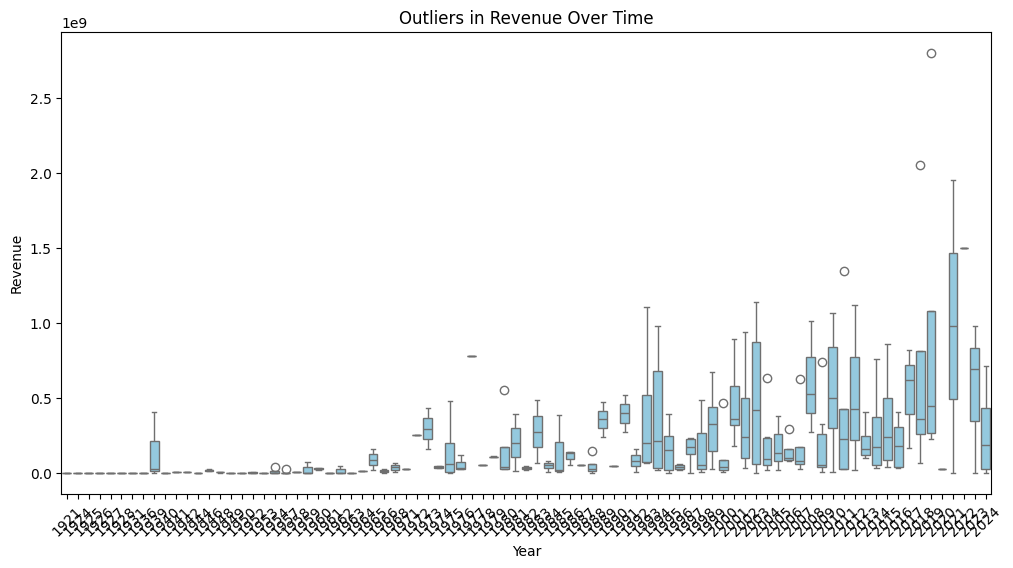

In [137]:
# Investigate outliers in revenue over time
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies_cleaned_df, x='year', y='revenue', color='skyblue')
plt.title('Outliers in Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Key findings from the box plot investigating outliers in revenue over time:

# 1. **Presence of Outliers**: The box plot reveals several outliers in revenue, representing movies with exceptionally high earnings compared to others in the same time period.

# 2. **Increasing Revenue Over Time**: There is a noticeable trend of increasing revenue over the years, with more recent movies generally earning higher revenues.

# 3. **Wide Revenue Range**: The interquartile range (IQR) of revenue widens over time, indicating greater variability in movie revenues in recent years.

# 4. **Blockbuster Effect**: The outliers often correspond to blockbuster movies that dominate the box office, significantly impacting the overall revenue trends.

# 5. **Historical Trends**: Older movies tend to have lower revenues, which could be attributed to inflation, smaller audiences, or limited global distribution during earlier decades.

# 6. **Consistency in Earlier Years**: In earlier years, the revenue distribution appears more consistent, with fewer extreme outliers compared to recent decades.

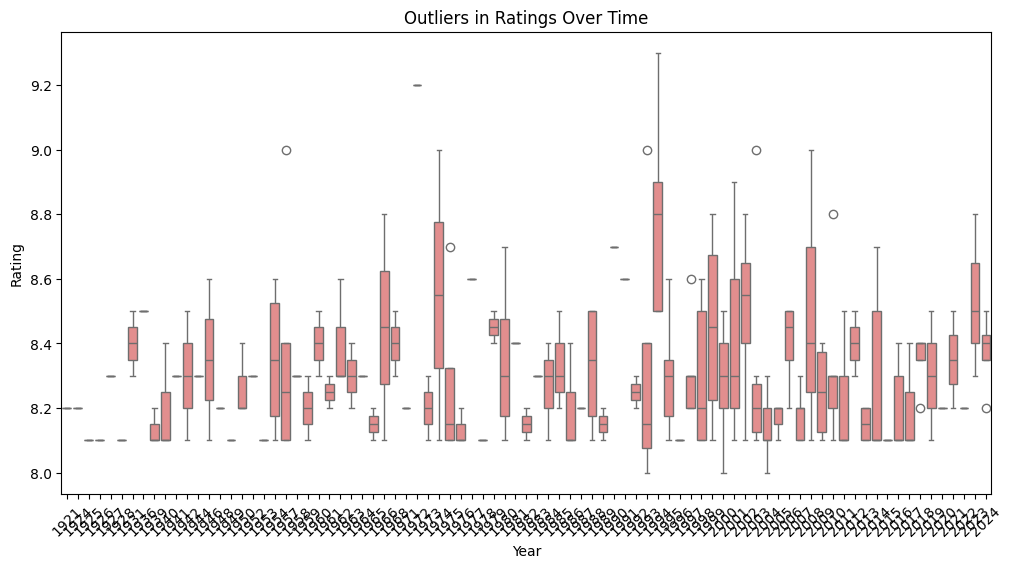

In [138]:
# Investigate outliers in ratings over time
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies_cleaned_df, x='year', y='rating', color='lightcoral')
plt.title('Outliers in Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

In [ ]:
### Key findings from the boxplot investigating outliers in ratings over time are:

# 1. **Stable Ratings**: Ratings appear to be relatively stable over time, with no significant upward or downward trend.

# 2. **High Ratings**: Most movies have high ratings, typically clustered around 8.0–9.0, indicating a focus on top-rated movies in the dataset.

# 3. **Few Outliers**: There are occasional outliers with exceptionally high or low ratings, but these do not significantly affect the overall trend.

# 4. **Consistency Over Time**: The consistency in ratings suggests that the quality of movies, as perceived by audiences, has remained steady over the years.

# 5. **Dataset Focus**: The dataset likely emphasizes critically acclaimed movies, which explains the consistently high ratings and narrow range.

### 3. Data Visualization:

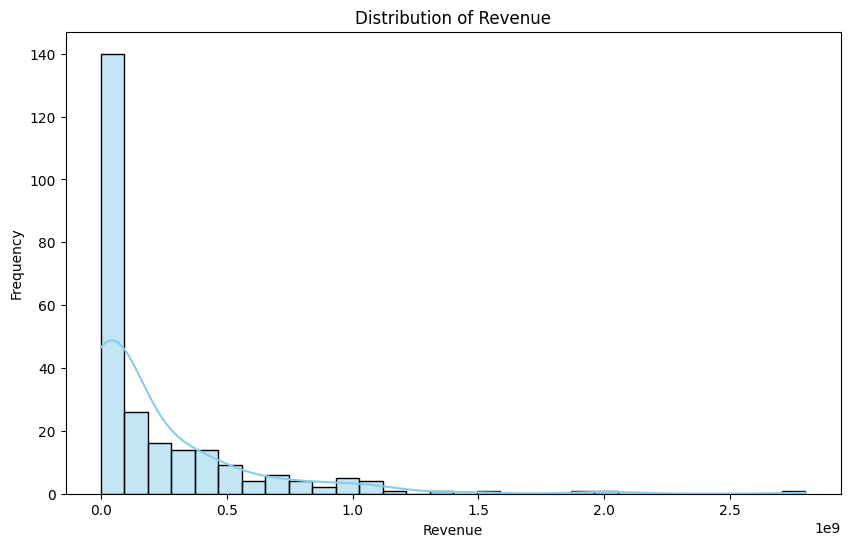

In [106]:
movies_cleaned_df['revenue'] = pd.to_numeric(movies_cleaned_df['revenue'], errors='coerce')

# Plot the distribution of revenue
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned_df['revenue'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

In [128]:
### Findings from the Distribution of Revenue

# 1. The distribution of revenue appears to be highly skewed, with a majority of movies earning significantly lower revenue compared to a few high-grossing movies.
# 2. There are noticeable outliers in the data, representing blockbuster movies with exceptionally high revenue.
# 3. The majority of movies fall within a lower revenue range, indicating that high revenue is not common across all movies.
# 4. The presence of a long tail in the distribution suggests that revenue varies widely among movies, with a small number of movies contributing disproportionately to the total revenue.

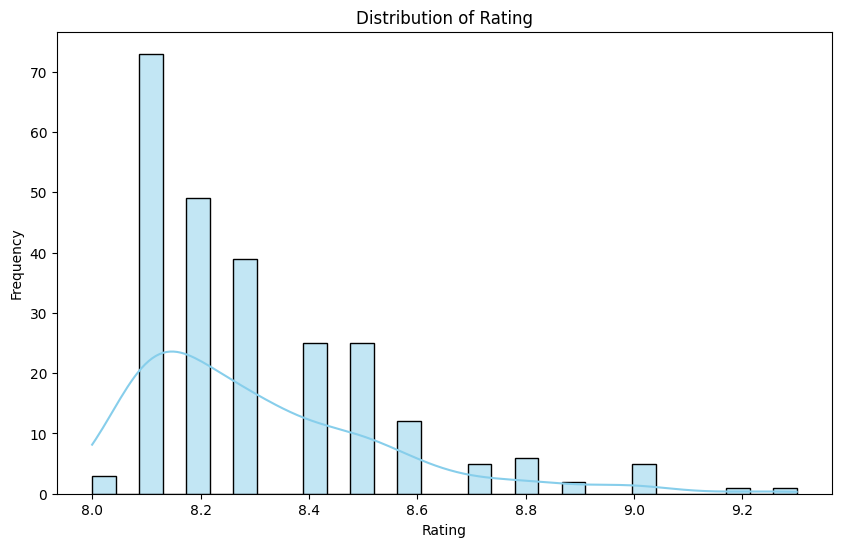

In [123]:
movies_cleaned_df['rating'] = pd.to_numeric(movies_cleaned_df['rating'], errors='coerce')

# Plot the distribution of revenue
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned_df['rating'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [126]:
# The key findings from the distribution of ratings are:

# 1. **Normal Distribution**: The ratings appear to follow a relatively normal distribution, with most movies clustered around a central value.
# 2. **High Ratings**: The majority of movies have high ratings, indicating that the dataset primarily consists of well-rated movies.
# 3. **Narrow Range**: The range of ratings is narrow, typically between 8.0 and 9.5, suggesting that the dataset focuses on top-rated movies.
# 4. **Few Outliers**: There are few outliers with exceptionally high or low ratings, indicating consistency in the quality of movies in the dataset.

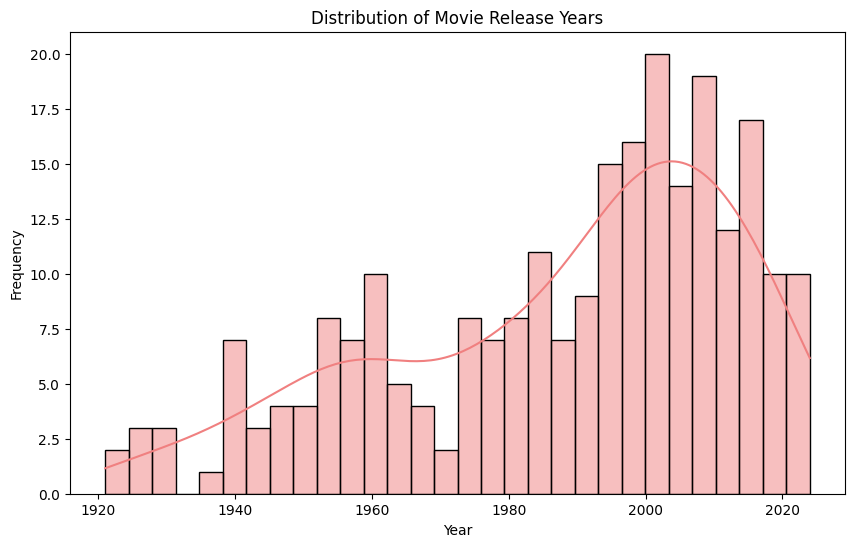

In [129]:
# Plot the distribution of movie release years
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned_df['year'].dropna(), bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Here are the key highlights from the distribution of movie release years:

# 1. **Skewed Distribution**: The distribution of movie release years may show a skewed pattern, with more movies being released in recent decades compared to earlier years.

# 2. **Clustering**: There could be clustering of movies around certain time periods, reflecting trends in movie production during those years.

# 3. **Historical Trends**: The distribution might highlight historical trends in the film industry, such as the rise of blockbuster movies or the impact of technological advancements.

# 4. **Outliers**: Older movies (e.g., from the 1950s or earlier) might appear as outliers, representing classics or historically significant films.

# 5. **Dataset Focus**: The dataset may focus on movies from a specific time range (e.g., 1950-2020), which could influence the observed distribution.

# 6. **Insights into Popularity**: Peaks in the distribution might indicate periods of increased movie production or the popularity of certain genres or styles during those years.

#### • Investigate any trends or outliers in revenue and rating data over time.

/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/2891382546.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=movies_cleaned_df, x='year', y='revenue', ci=None)


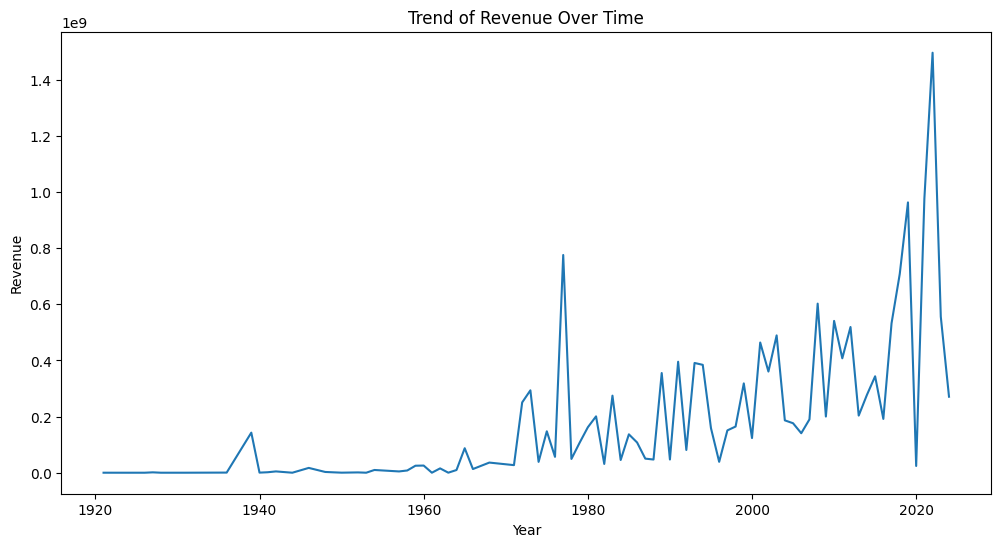

In [136]:
# Plot the trend of revenue over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_cleaned_df, x='year', y='revenue', ci=None)
plt.title('Trend of Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

In [ ]:
### Key Findings from the Trend of Revenue Over Time:

#### 1. **Increasing Trend**: There is a noticeable upward trend in movie revenues over time, indicating that movies released in recent years tend to generate higher revenues compared to older movies.

#### 2. **Blockbuster Effect**: The trend highlights the emergence of blockbuster movies in recent decades, with some movies achieving exceptionally high revenues.

#### 3. **Technological Advancements**: The increase in revenue over time may reflect advancements in technology, marketing, and global distribution, which have expanded the audience reach and revenue potential of movies.

#### 4. **Outliers**: There are significant outliers in the data, representing movies with exceptionally high revenues, which may skew the overall trend.

#### 5. **Economic Factors**: The trend may also be influenced by inflation and changes in ticket prices, which could contribute to higher revenue figures for more recent movies.

#### 6. **Genre Popularity**: The rise in revenue could also be linked to the growing popularity of certain genres, such as superhero movies and franchises, which dominate the box office in recent years.

/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/630383434.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=movies_cleaned_df, x='year', y='rating', ci=None)


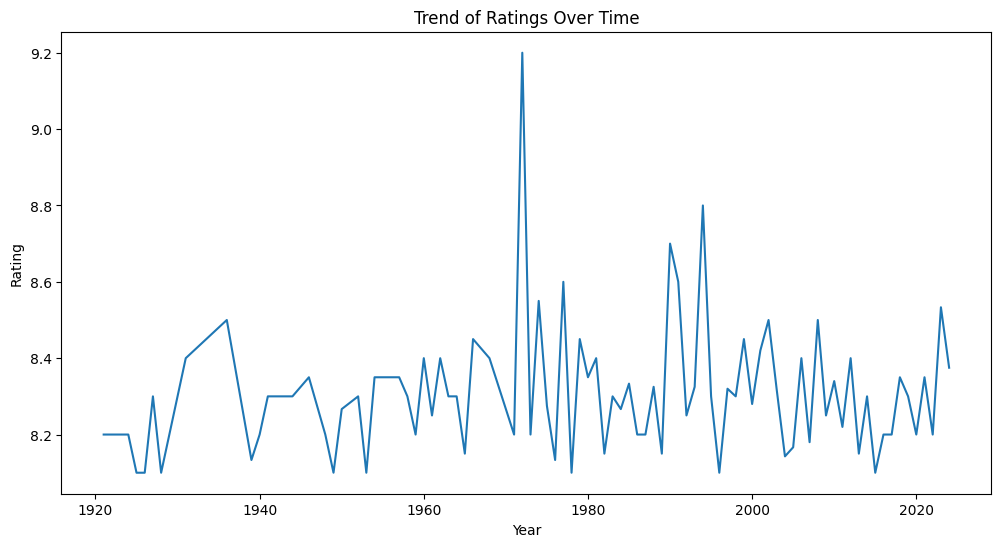

In [131]:
# Plot the trend of ratings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_cleaned_df, x='year', y='rating', ci=None)
plt.title('Trend of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

In [ ]:
#### Key findings from the trend of ratings over time:

#### 1. **Stable Ratings**: The ratings of movies appear to remain relatively stable over time, with no significant upward or downward trend.

#### 2. **High Ratings**: Most movies in the dataset maintain high ratings, indicating a focus on top-rated movies.

#### 3. **Consistency**: The consistency in ratings over time suggests that the quality of movies, as perceived by audiences, has not drastically changed.

#### 4. **Outliers**: There may be occasional outliers with exceptionally high or low ratings, but these do not significantly affect the overall trend.

#### 5. **Dataset Focus**: The dataset likely emphasizes critically acclaimed movies, which could explain the consistently high ratings.

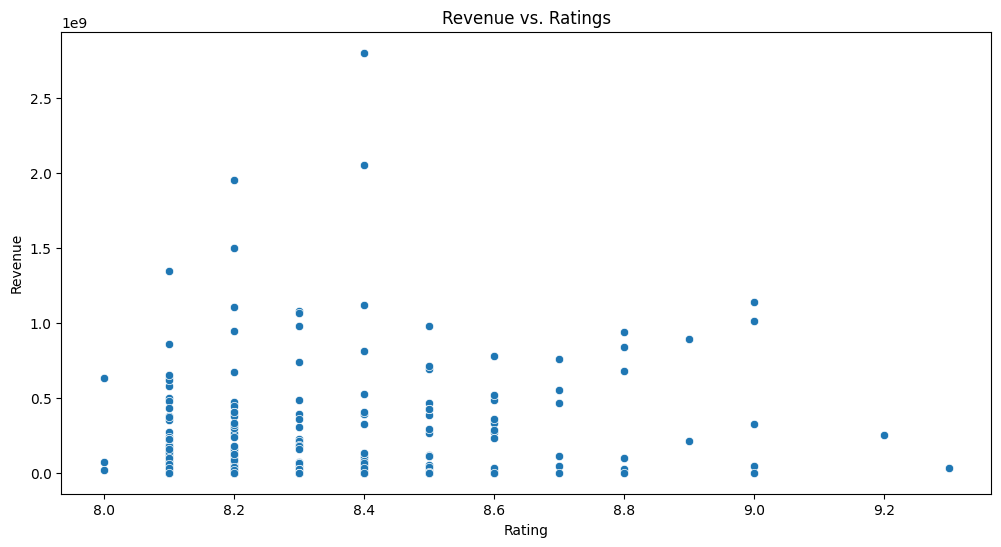

In [113]:
# Scatter plot for revenue vs. ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies_cleaned_df, x='rating', y='revenue')
plt.title('Revenue vs. Ratings')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()

In [ ]:
#### Key findings from the scatter plot for revenue vs. ratings:

1. **No Strong Correlation**: There does not appear to be a strong correlation between revenue and ratings. High-rated movies do not necessarily generate high revenue, and vice versa.

2. **Outliers**: There are noticeable outliers in the revenue data, with some movies earning exceptionally high revenue regardless of their ratings.

3. **Cluster of High Ratings**: Most movies are clustered around high ratings (8.0–9.0), indicating that the dataset focuses on top-rated movies.

4. **Wide Revenue Range**: Revenue values vary widely, even for movies with similar ratings, highlighting the influence of factors other than ratings on revenue.

5. **Blockbuster Effect**: Some movies with average ratings still achieve very high revenue, likely due to factors such as marketing, franchise popularity, or global appeal.

### 4. Movie and Director Trends:

In [ ]:
#### • Investigate the most recurrent directors and actors over the years.


# Step 1: Split the directors and actors columns into lists
movies_cleaned_df['directors_list'] = movies_cleaned_df['directors'].str.split(', ')
movies_cleaned_df['actors_list'] = movies_cleaned_df['lead_actors'].str.split(', ')

# Display the first few rows to verify
movies_cleaned_df[['directors_list', 'actors_list']].head()

,directors_list,actors_list
0,"[Jack Lawrence, Frank Darabont, Bob Gunton, Ha...","[Bob Gunton, Tim Robbins, Morgan Freeman]"
1,"[Marlon Brando, Kay Adams, Al Pacino, Francis ...","[James Caan, Marlon Brando, Al Pacino]"
2,"[Aaron Eckhart, Christopher Nolan, Jack Nichol...","[Aaron Eckhart, Heath Ledger, Christian Bale]"
3,"[Al Pacino, Robert Duvall, Robert De Niro, Fra...","[Robert Duvall, Robert De Niro, Al Pacino]"
4,"[Martin Balsam, E.G. Marshall, Juror #10, Lee ...","[Lee J. Cobb, Martin Balsam, Henry Fonda]"


In [144]:
# Step 2: Count the Occurrences

# Flatten the list of directors and count occurrences
all_directors = [director for sublist in movies_cleaned_df['directors_list'] for director in sublist]
director_counts = Counter(all_directors)

# Convert to DataFrame for easier manipulation
director_counts_df = pd.DataFrame(director_counts.items(), columns=['Directors', 'Count'])
director_counts_df = director_counts_df.sort_values(by='Count', ascending=False)

# Display the top 10 directors
director_counts_df.head(10)

,Directors,Count
30,Robert De Niro,9
56,Steven Spielberg,8
18,Christopher Nolan,8
607,Stanley Kubrick,7
150,Martin Scorsese,7
103,Tom Hanks,7
193,Akira Kurosawa,6
127,Leonardo DiCaprio,6
129,Harrison Ford,6
296,Alfred Hitchcock,6


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/3646420272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=director_counts_df.head(10), x='Count', y='Directors', palette='viridis')


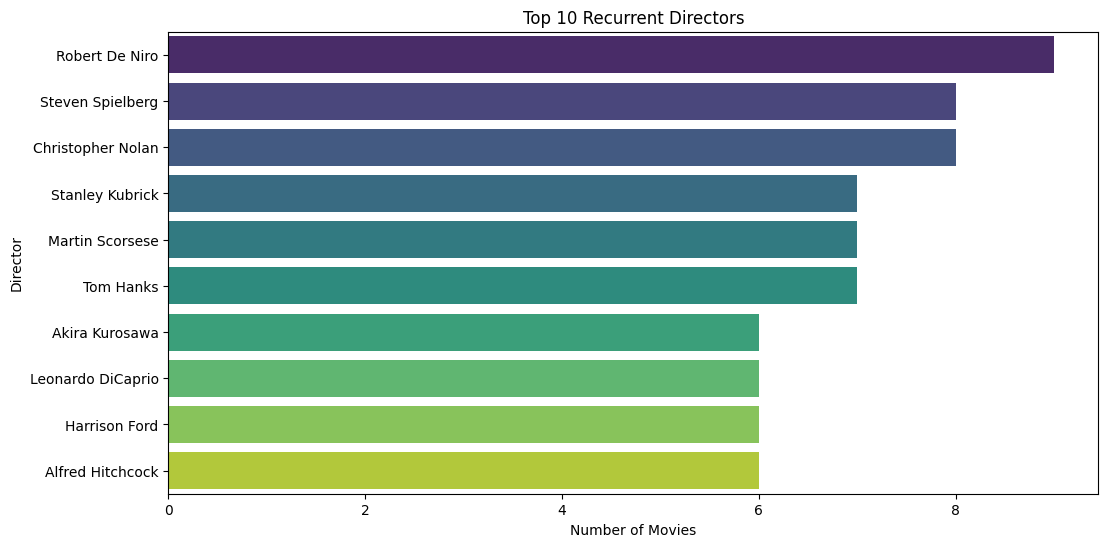

In [146]:
# Plot the top 10 directors
plt.figure(figsize=(12, 6))
sns.barplot(data=director_counts_df.head(10), x='Count', y='Directors', palette='viridis')
plt.title('Top 10 Recurrent Directors')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


In [ ]:
# Find movies directed by "Robert De Niro"
robert_de_niro_movies = movies_cleaned_df[movies_cleaned_df['directors'].str.contains("Robert De Niro", na=False)]
print(robert_de_niro_movies)

                               title  year  rating  \
3           4. The Godfather Part II  1974     9.0   
16                    17. GoodFellas  1990     8.7   
85                         86. Joker  2019     8.3   
86   87. Once Upon a Time in America  1984     8.3   
104                        105. Heat  1995     8.3   
126                 127. Taxi Driver  1976     8.2   
141                      142. Casino  1995     8.2   
173                 174. Raging Bull  1980     8.1   
203             204. The Deer Hunter  1978     8.1   

                                                 genre  \
3                Epic, Gangster, Tragedy, Crime, Drama   
16   Docudrama, Gangster, True Crime, Biography, Cr...   
85   Psychological Drama, Psychological Thriller, T...   
86   Dark Comedy, Epic, Gangster, Period Drama, Cri...   
104  Action Epic, Cop Drama, Epic, Gangster, Heist,...   
126                  Psychological Drama, Crime, Drama   
141  Docudrama, Epic, Gangster, True Crime, Crime, ..

In [ ]:
# Flatten the list of actors and count occurrences
all_actors = [actor for sublist in movies_cleaned_df['actors_list'] for actor in sublist]
actor_counts = Counter(all_actors)

# Convert to DataFrame for easier manipulation
actor_counts_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count'])
actor_counts_df = actor_counts_df.sort_values(by='Count', ascending=False)

# Display the top 10 actors
print(actor_counts_df.head(10))

                 Actor  Count
10      Robert De Niro      9
36       Harrison Ford      6
33   Leonardo DiCaprio      6
27           Tom Hanks      6
26      Clint Eastwood      5
60          Matt Damon      5
124    Charles Chaplin      5
8       Christian Bale      5
50        Kevin Spacey      4
151       Mark Ruffalo      4


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/663139141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=actor_counts_df.head(10), x='Count', y='Actor', palette='magma')


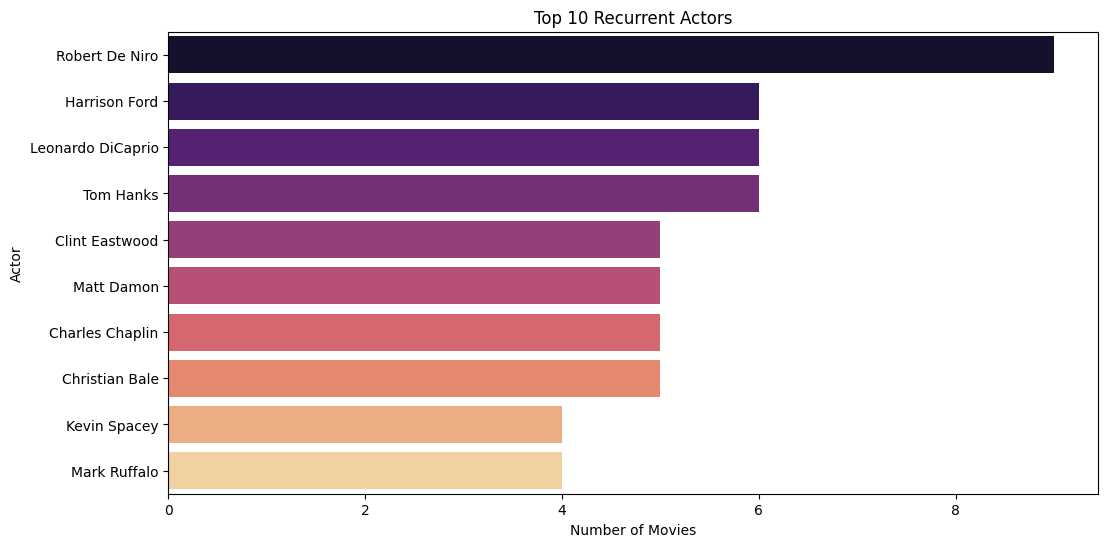

In [148]:
# Plot the top 10 actors
plt.figure(figsize=(12, 6))
sns.barplot(data=actor_counts_df.head(10), x='Count', y='Actor', palette='magma')
plt.title('Top 10 Recurrent Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

In [150]:
# Find movies Acted by "Robert De Niro"
robert_de_niro_movies = movies_cleaned_df[movies_cleaned_df['directors'].str.contains("Robert De Niro", na=False)]
print(robert_de_niro_movies)

                               title  year  rating  \
3           4. The Godfather Part II  1974     9.0   
16                    17. GoodFellas  1990     8.7   
85                         86. Joker  2019     8.3   
86   87. Once Upon a Time in America  1984     8.3   
104                        105. Heat  1995     8.3   
126                 127. Taxi Driver  1976     8.2   
141                      142. Casino  1995     8.2   
173                 174. Raging Bull  1980     8.1   
203             204. The Deer Hunter  1978     8.1   

                                                 genre  \
3                Epic, Gangster, Tragedy, Crime, Drama   
16   Docudrama, Gangster, True Crime, Biography, Cr...   
85   Psychological Drama, Psychological Thriller, T...   
86   Dark Comedy, Epic, Gangster, Period Drama, Cri...   
104  Action Epic, Cop Drama, Epic, Gangster, Heist,...   
126                  Psychological Drama, Crime, Drama   
141  Docudrama, Epic, Gangster, True Crime, Crime, ..

In [155]:
# Filter movies directed and acted in a key role by "Robert De Niro"
robert_de_niro_movies = movies_cleaned_df[
    (movies_cleaned_df['directors'].str.contains("Robert De Niro", na=False)) &
    (movies_cleaned_df['lead_actors'].str.contains("Robert De Niro", na=False))
]
# Display the filtered movies
print(robert_de_niro_movies)

                               title  year  rating  \
3           4. The Godfather Part II  1974     9.0   
16                    17. GoodFellas  1990     8.7   
85                         86. Joker  2019     8.3   
86   87. Once Upon a Time in America  1984     8.3   
104                        105. Heat  1995     8.3   
126                 127. Taxi Driver  1976     8.2   
141                      142. Casino  1995     8.2   
173                 174. Raging Bull  1980     8.1   
203             204. The Deer Hunter  1978     8.1   

                                                 genre  \
3                Epic, Gangster, Tragedy, Crime, Drama   
16   Docudrama, Gangster, True Crime, Biography, Cr...   
85   Psychological Drama, Psychological Thriller, T...   
86   Dark Comedy, Epic, Gangster, Period Drama, Cri...   
104  Action Epic, Cop Drama, Epic, Gangster, Heist,...   
126                  Psychological Drama, Crime, Drama   
141  Docudrama, Epic, Gangster, True Crime, Crime, ..

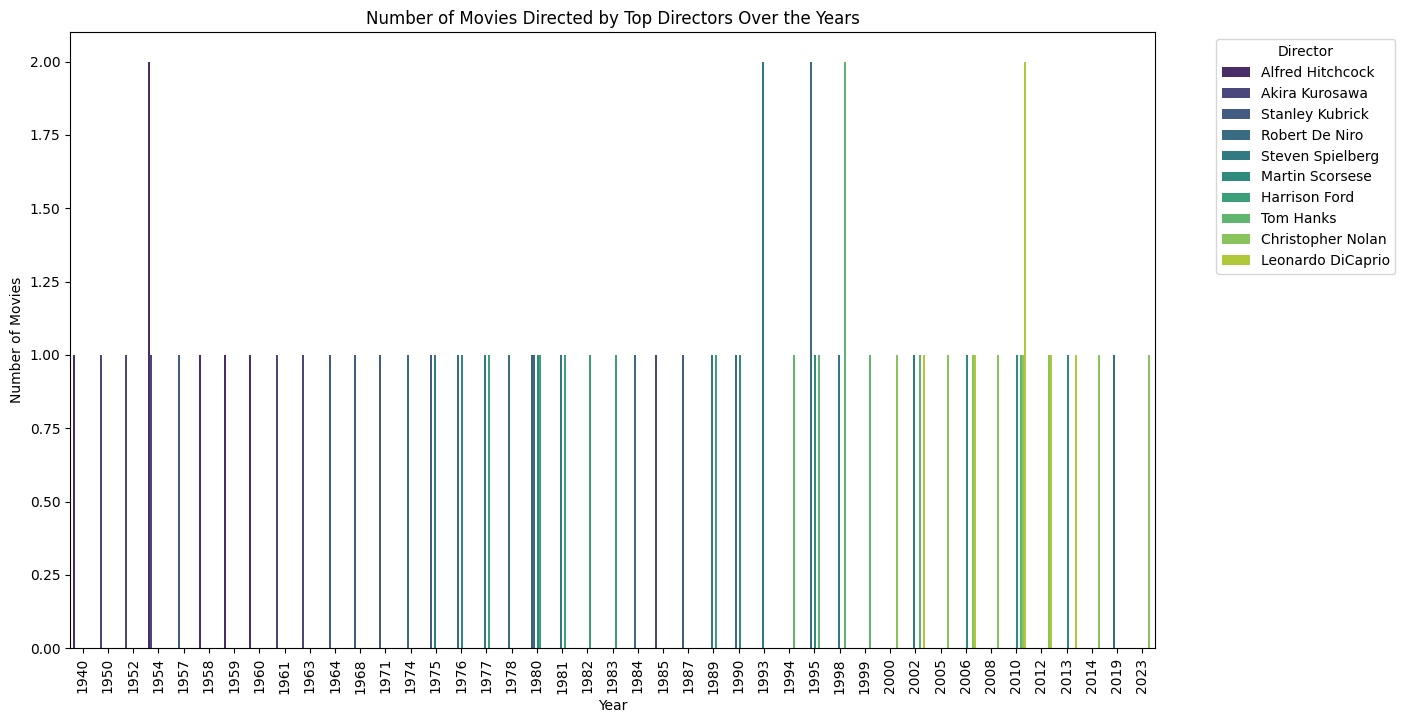

In [ ]:
#### • Identify trends in the number of movies directed by prominent directors, and how often they appear in the top-grossing movies.

# Filter the dataset for the top 10 directors
top_directors = director_counts_df.head(10)['Directors'].tolist()
top_directors_df = movies_cleaned_df[movies_cleaned_df['directors_list'].apply(lambda x: any(director in x for director in top_directors))]

# Explode the directors_list to have one director per row
exploded_directors_df = top_directors_df.explode('directors_list')

# Filter for the top 10 directors
exploded_directors_df = exploded_directors_df[exploded_directors_df['directors_list'].isin(top_directors)]

# Plot the number of movies directed by top directors over the years
plt.figure(figsize=(14, 8))
sns.countplot(data=exploded_directors_df, x='year', hue='directors_list', palette='viridis')
plt.title('Number of Movies Directed by Top Directors Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()



In [175]:
# Display the relevant movies
relevant_movies = exploded_directors_df[['title', 'year', 'directors_list', 'rating']]
print(relevant_movies)

                        title  year     directors_list  rating
2          3. The Dark Knight  2008  Christopher Nolan     9.0
3    4. The Godfather Part II  1974     Robert De Niro     9.0
6         7. Schindler's List  1993   Steven Spielberg     9.0
10           11. Forrest Gump  1994          Tom Hanks     8.8
13              14. Inception  2010  Christopher Nolan     8.8
..                        ...   ...                ...     ...
185         186. Barry Lyndon  1975    Stanley Kubrick     8.1
189         190. Blade Runner  1982      Harrison Ford     8.1
201                 202. Jaws  1975   Steven Spielberg     8.1
203      204. The Deer Hunter  1978     Robert De Niro     8.1
248              249. Rebecca  1940   Alfred Hitchcock     8.1

[70 rows x 4 columns]
